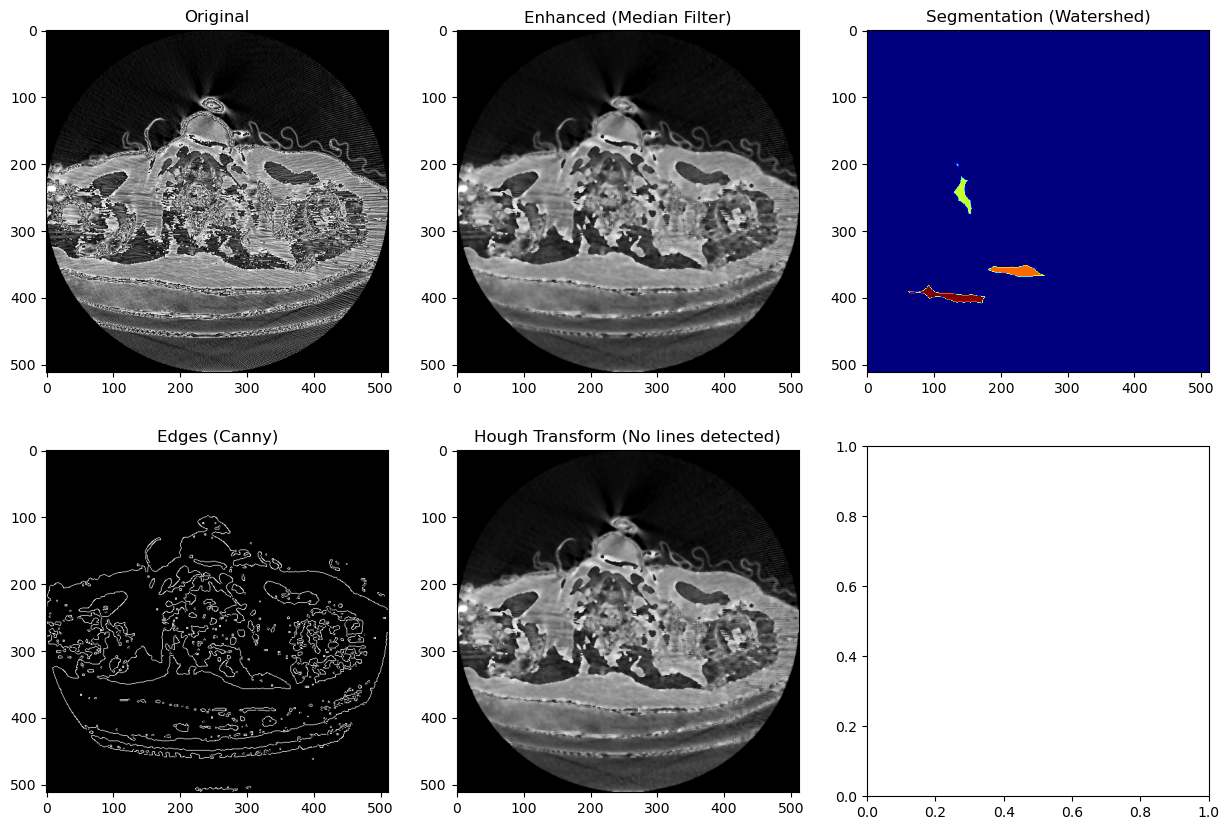

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pydicom

# Load your DICOM image using pydicom library
path = 'C:/Users/AKSHAT/Documents/cpcode/dataset/manifest-1682931143289/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-NA-NA-30178/3000566.000000-NA-03192/1-002.dcm'
ds = pydicom.dcmread(path)

# Convert DICOM image to OpenCV format
img = ds.pixel_array.astype('uint8')

# Apply median filter to the image
img_median = cv2.medianBlur(img, 5)

# Threshold the image to create a binary image
_, img_thresh = cv2.threshold(img_median, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Convert binary image to 8-bit unsigned format
img_thresh = cv2.convertScaleAbs(img_thresh)

# Apply watershed algorithm to segment the image
markers = cv2.distanceTransform(img_thresh, cv2.DIST_L2, 5)
_, markers = cv2.threshold(markers, 0.7*markers.max(), 255, cv2.THRESH_BINARY)
markers = cv2.connectedComponents(markers.astype('uint8'))[1]

# Perform edge detection using Canny algorithm
edges = cv2.Canny(img_thresh, 100, 200)

# Apply Hough Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Display all images
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title("Original")

axs[0, 1].imshow(img_median, cmap='gray')
axs[0, 1].set_title("Enhanced (Median Filter)")

axs[0, 2].imshow(markers, cmap='jet')
axs[0, 2].set_title("Segmentation (Watershed)")

axs[1, 0].imshow(edges, cmap='gray')
axs[1, 0].set_title("Edges (Canny)")

if lines is not None:
    img_colorized = cv2.cvtColor(img_median, cv2.COLOR_GRAY2RGB)
    for line in lines:
        rho, theta = line[0]
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a*rho, b*rho
        x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*(a))
        x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*(a))
        cv2.line(img_colorized, (x1, y1), (x2, y2), (0, 0, 255), 2)

    axs[1, 1].imshow(img_colorized)
    axs[1, 1].set_title("Hough Transform")
else:
    axs[1, 1].imshow(img_median, cmap='gray')
    axs[1, 1].set_title("Hough Transform (No lines detected)")

plt.show()